# Análisis Forraje

### CONCLUSIÓN: La regresión lineal no es el modelo para los datos segun yo. Quizas un k-means o k-nn que trabaje con agrupación por la forma que tienen los datos.

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [5]:
df = pd.read_csv('datos/csv/datos_forraje.csv', sep=",")
df

,fecha,codigo_gps,coordenada_completa,longitug,latitud,fn_valor_pastoral
0,11/2015,CG T01,-68.7056907/-43.291952,-68.705691,-43.291952,"3,60"
1,11/2016,CG T01,-68.7056907/-43.291952,-68.705691,-43.291952,"15,00"
2,11/2015,CG T02,-68.6608421/-43.2535963,-68.660842,-43.253596,"0,60"
3,11/2016,CG T02,-68.6608421/-43.2535963,-68.660842,-43.253596,"15,40"
4,11/2015,CG T03,-68.616647/-43.2181445,-68.616647,-43.218145,"1,60"
...,...,...,...,...,...,...
395,01/2017,CT2 T23,-66.0338334/-42.5443476,-66.033833,-42.544348,"13,00"
396,02/2016,CT2 T24,-66.082257/-42.5184357,-66.082257,-42.518436,"17,00"
397,01/2017,CT2 T24,-66.082257/-42.5184357,-66.082257,-42.518436,"11,40"
398,02/2016,CT2 T25,-66.1336747/-42.4956508,-66.133675,-42.495651,"6,00"


In [7]:
df = pd.read_csv('datos/csv/datos_climaticos_3_sondas.csv', sep=",")
df

,id_x,nombre,latitud,longitud,altura,pertenencia,inicio_actividad,localidad,id_inta,ubicacion_exacta,...,temperatura_media,temperatura_maxima,humedad,velocidad_viento,velocidad_max_viento,barometro,mm_lluvia,radiacion_solar,sonda,direccion_viento
0,127,Escuela Nº 92 Sepaucal [ Davis VantageVue ],-42.16,-67.24,36.0,INTA,AGO 2012,Telsen,46,Escuela N 92 Sepaucal,...,19.1,3.9,63.3,7.6,46.7,926.4,0.0,0.0,127,W
1,127,Escuela Nº 92 Sepaucal [ Davis VantageVue ],-42.16,-67.24,36.0,INTA,AGO 2012,Telsen,46,Escuela N 92 Sepaucal,...,15.2,3.1,73.7,4.6,35.4,937.5,1.0,0.0,127,NNE
2,127,Escuela Nº 92 Sepaucal [ Davis VantageVue ],-42.16,-67.24,36.0,INTA,AGO 2012,Telsen,46,Escuela N 92 Sepaucal,...,18.2,8.2,60.5,11.6,53.1,929.9,0.8,0.0,127,NW
3,127,Escuela Nº 92 Sepaucal [ Davis VantageVue ],-42.16,-67.24,36.0,INTA,AGO 2012,Telsen,46,Escuela N 92 Sepaucal,...,11.1,2.2,75.8,5.6,30.6,937.0,7.6,0.0,127,SSW
4,127,Escuela Nº 92 Sepaucal [ Davis VantageVue ],-42.16,-67.24,36.0,INTA,AGO 2012,Telsen,46,Escuela N 92 Sepaucal,...,20.6,1.6,48.9,11.6,37.0,936.4,0.0,0.0,127,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,147,Laguna Fria [ Vantage Pro2 ],-42.47,-68.09,36.0,INTA,SEP 2008,Laguna Fría,17,Laguna Fría Flia Milla,...,27.3,14.8,50.2,0.0,0.0,1010.1,7.4,0.0,147,NaN
6825,147,Laguna Fria [ Vantage Pro2 ],-42.47,-68.09,36.0,INTA,SEP 2008,Laguna Fría,17,Laguna Fría Flia Milla,...,28.6,11.8,46.4,0.0,0.0,1009.8,0.0,0.0,147,NaN
6826,147,Laguna Fria [ Vantage Pro2 ],-42.47,-68.09,36.0,INTA,SEP 2008,Laguna Fría,17,Laguna Fría Flia Milla,...,23.1,6.0,45.6,0.0,0.0,1005.1,0.4,0.0,147,NaN
6827,147,Laguna Fria [ Vantage Pro2 ],-42.47,-68.09,36.0,INTA,SEP 2008,Laguna Fría,17,Laguna Fría Flia Milla,...,16.8,2.9,49.2,0.0,0.0,1012.4,0.4,0.0,147,NaN


In [20]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,acum_anual,acum_verano
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,"3,60",1.437643,2.597643,0.477643,Gastre,119.8,13.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,"0,60",1.354438,2.514438,0.394438,Gastre,119.8,13.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,"1,60",1.274792,2.434792,0.314792,Gastre,119.8,13.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,"8,00",1.224804,2.384804,0.264804,Gastre,119.8,13.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,"4,40",1.202783,2.362783,0.242783,Gastre,119.8,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,"15,40",2.013430,0.853430,2.973430,Telsen,215.6,53.5
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,"11,20",1.992204,0.832204,2.952204,Telsen,215.6,53.5
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,"13,00",1.981819,0.821819,2.941819,Telsen,215.6,53.5
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,"11,40",1.959307,0.799307,2.919307,Telsen,215.6,53.5


## Regresión Lineal

In [19]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
data = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
data

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,acum_anual,acum_verano
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,119.8,13.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,119.8,13.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,119.8,13.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,119.8,13.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,119.8,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,215.6,53.5
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,215.6,53.5
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,215.6,53.5
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,215.6,53.5


In [25]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,acum_anual,acum_verano
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-42.740748,-67.915592,8.758000,0.917748,1.420959,0.959369,206.706000,39.439000
std,0.290505,0.912005,5.935147,0.485753,0.793833,0.947505,72.859119,19.817349
min,-43.313997,-69.216771,0.000000,0.047987,0.000160,0.011856,119.800000,13.700000
25%,-42.923910,-68.577835,3.800000,0.535329,0.718245,0.169017,142.300000,13.700000
50%,-42.664940,-68.102476,8.300000,1.011893,1.536611,0.583389,185.200000,47.900000
75%,-42.519414,-67.349483,12.850000,1.173102,2.179888,1.779100,288.100000,58.200000
max,-42.364297,-65.944623,29.400000,2.013430,2.597643,2.973430,304.100000,58.200000


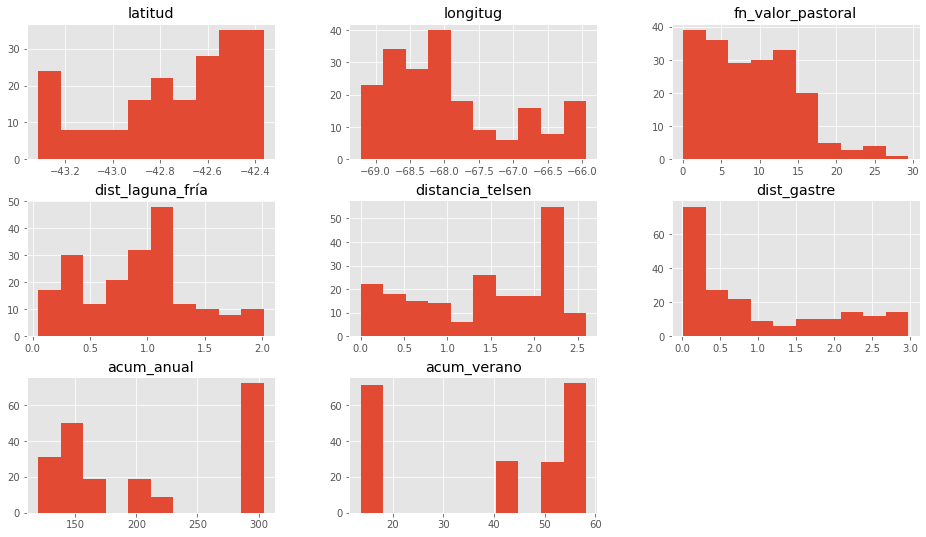

In [26]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

<AxesSubplot:>

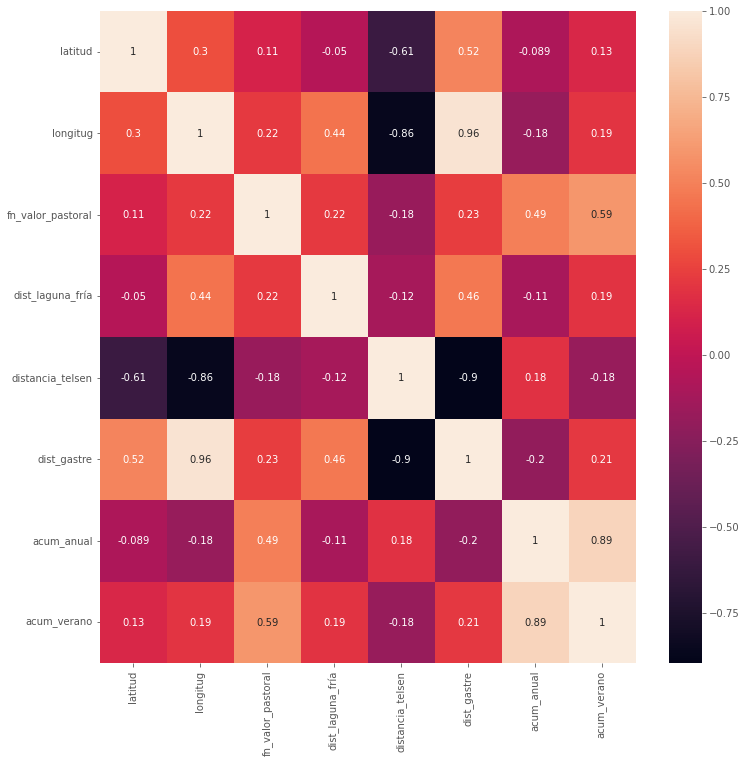

In [29]:
correlation_mat = data.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Segun la matriz el valor pastoral esta medianamente correlacionado con la lluvia: 0.49 para anual y 0.59 para el verano

## Predecir el valor pastoral a partir del acumulado anual

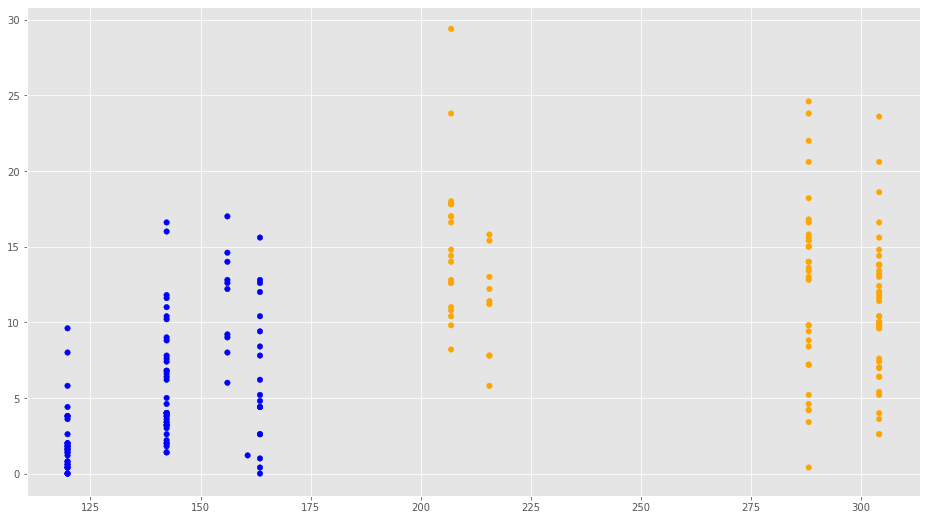

In [27]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acum_anual'].values
f2 = data['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['acum_anual']>206):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [28]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acum_anual"]]
X_train = np.array(dataX)
y_train = data['fn_valor_pastoral'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.04025114]
Independent term: 
 0.4378480577689867
Mean squared error: 26.49
Variance score: 0.24


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.04 y el término independiente “b” es 0.43. Tenemos un Error Cuadrático bastate grande creo… por lo que este modelo podria no ser muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

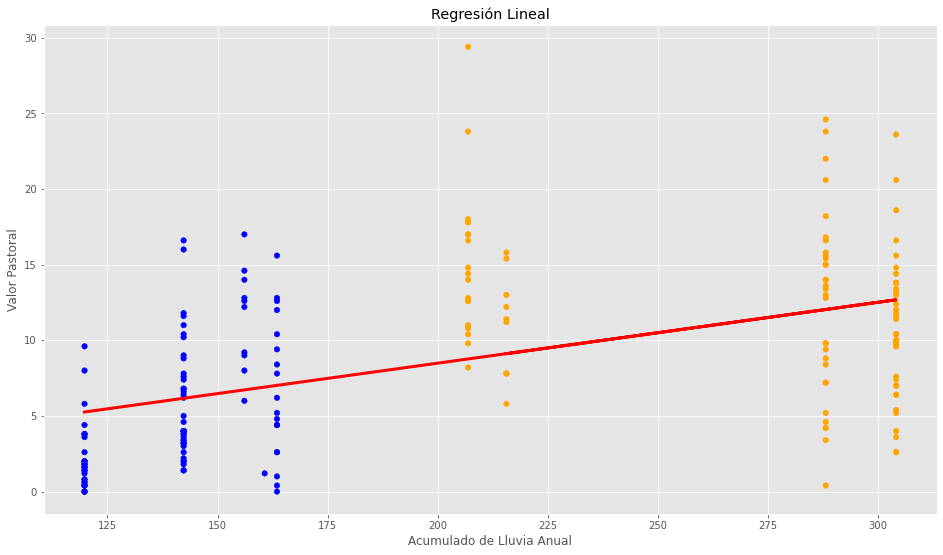

In [30]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Anual')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

In [31]:
# Vamos a comprobar:
# Quiero predecir cuántos "valor pastoral" voy a obtener por un acumulado de lluvia de 200,
# según nuestro modelo, hacemos:
y_p = regr.predict([[200]])
print(round(float(y_p),2))

8.49


## Predecir el valor pastoral a partir de la lluvia acumulada en el verano

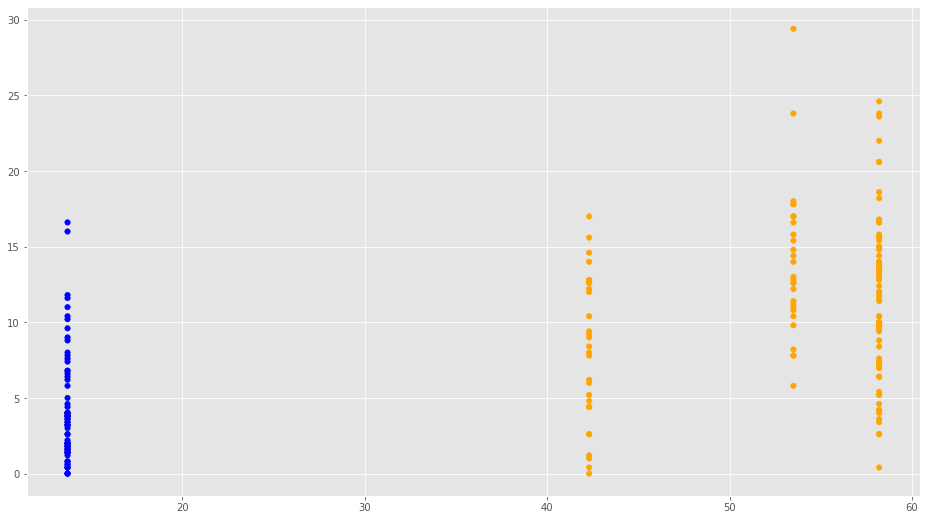

In [33]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acum_verano'].values
f2 = data['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['acum_verano']>39):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [34]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acum_verano"]]
X_train = np.array(dataX)
y_train = data['fn_valor_pastoral'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.17560675]
Independent term: 
 1.8322455570390925
Mean squared error: 23.00
Variance score: 0.34


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.17 y el término independiente “b” es 1.83. Tenemos un Error Cuadrático bastate grande creo… por lo que este modelo podria no ser muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

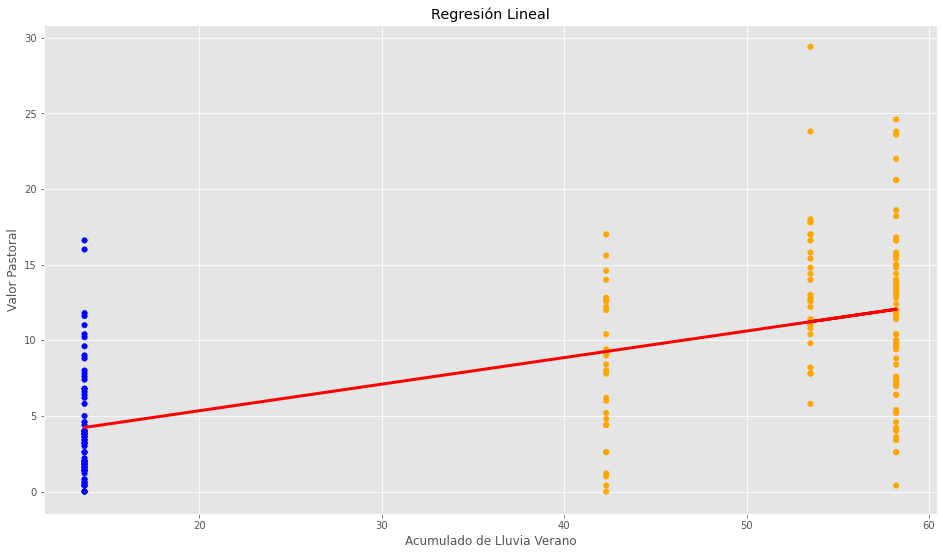

In [35]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Verano')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

In [37]:
# Vamos a comprobar:
# Quiero predecir cuántos "valor pastoral" voy a obtener por un acumulado de lluvia en el verano de 50,
# según nuestro modelo, hacemos:
y_p = regr.predict([[50]])
print(round(float(y_p),2))

10.61


### CONCLUSIÓN: La regresión lineal no es el modelo para los datos segun yo. Quizas un k-means o k-nn que trabaje con agrupación por la forma que tienen los datos.

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)